In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

#Read in the dataset
df=pd.read_csv('data1.csv')

In [2]:
#Preprocess the dataset using get_dummies
RoomName=pd.get_dummies(df['Room_Name'])
BuildingOccupancy=pd.get_dummies(df['Building_Occupancy'])
FireSprinkler=pd.get_dummies(df['Fire_Sprinkler'], drop_first=True)
SmokeDetector=pd.get_dummies(df['Smoke_Detector'], drop_first=True)
df=pd.concat([RoomName,BuildingOccupancy,FireSprinkler,df['Room_Area'],SmokeDetector],axis=1)

In [3]:
#Preprocess the dataset using Standard Scaler
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaler.fit(df.drop(1,axis=1))
scaled_features=scaler.transform(df.drop(1, axis=1))
df_feat=pd.DataFrame(scaled_features,columns=df.columns[:-1])

In [4]:
#Split the dataset to test and train data
from sklearn.cross_validation import train_test_split
df_feat=df
X = df_feat
Y = df[1]
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.3)

/anaconda/lib/python2.7/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [5]:
#Fit the training data to the KNN classifier algorithm and produce classification prediction of the test data
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train,Y_train)
pred = knn.predict(X_test)

In [6]:
#Confusion matrix and Classification report of the KNN classifier
from sklearn.metrics import classification_report,confusion_matrix
print(confusion_matrix(Y_test,pred))
print(classification_report(Y_test,pred))

[[44  2]
 [ 0 53]]
             precision    recall  f1-score   support

          0       1.00      0.96      0.98        46
          1       0.96      1.00      0.98        53

avg / total       0.98      0.98      0.98        99



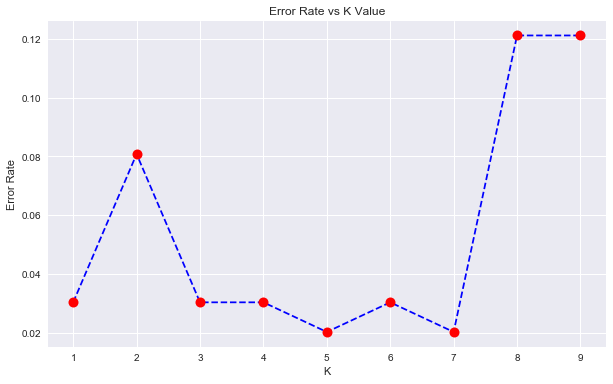

In [7]:

#For loop to test how many nearest neighbors will produce the least error rate
error_rate=[]

for i in range(1,10):
    
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,Y_train)
    pred_i=knn.predict(X_test)
    error_rate.append(np.mean(pred_i != Y_test))
#plot graph to visualize the error rates produced of nearest neighbors ranging from 1-9
plt.figure(figsize=(10,6))
plt.plot(range(1,10),error_rate,color='blue',linestyle='dashed',marker='o',markerfacecolor='red',markersize=10)
plt.title('Error Rate vs K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

In [8]:
#list of the scores that will appended from the for loop using the mean_max_min function below
precision_list=[]
recall_list=[]
f1_score_list=[]
support_list=[]

#function to append the scores to each list
def mean_max_min(report):
    report_data = []
    lines = report.split('\n')
    for line in lines[2:-3]:
        row_data = line.split('      ')
        precision_list.append(float(row_data[2]))
        recall_list.append(float(row_data[3]))
        f1_score_list.append(float(row_data[4]))
        support_list.append(float(row_data[5]))

#loop of random state integers from 1-150 
for i in range(1,150):
    X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.3,random_state=i)
    knn = KNeighborsClassifier(n_neighbors=5)
    knn.fit(X_train,Y_train)
    pred_i=knn.predict(X_test)
    report = classification_report(Y_test,pred_i)
    mean_max_min(report)

In [9]:
#print out the scores min max and mean

print('minimum precision: ',min(precision_list))
print('maximum precision: ',max(precision_list))
print('mean precision',sum(precision_list)/len(precision_list))

print('minimum recall: ',min(recall_list))
print('maximum recall: ',max(recall_list))
print('mean recall',sum(recall_list)/len(recall_list))

print('minimum F1 Score: ',min(f1_score_list))
print('maximum F1 Score: ',max(f1_score_list))
print('mean F1 Score',sum(f1_score_list)/len(f1_score_list))

print('minimum support: ',min(support_list))
print('maximum support: ',max(support_list))
print('mean support',sum(support_list)/len(support_list))

('minimum precision: ', 0.85)
('maximum precision: ', 1.0)
('mean precision', 0.9641275167785232)
('minimum recall: ', 0.85)
('maximum recall: ', 1.0)
('mean recall', 0.9623825503355703)
('minimum F1 Score: ', 0.87)
('maximum F1 Score: ', 1.0)
('mean F1 Score', 0.9624496644295302)
('minimum support: ', 39.0)
('maximum support: ', 60.0)
('mean support', 49.5)


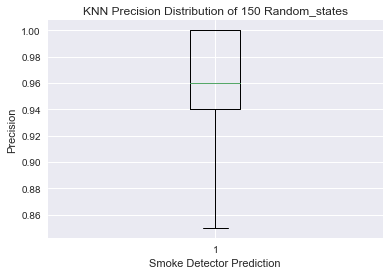

In [10]:
#visualize the precision distribution
plt.boxplot(precision_list)
plt.title('KNN Precision Distribution of 150 Random_states')
plt.xlabel('Smoke Detector Prediction')
plt.ylabel('Precision')
plt.show()